# Лабораторная работа №4
### Прудникова Анастасия М8О-114СВ-24

1. Реализуйте метод восстановления плотности:
- методом ядерного сглаживания
- с помощью ЕМ алгоритма

2. Возьмите любой набор случайных точек в любой библиотеке, например Sci-learn mkbpx и визуализируйте эти данные и ту плотность, котораая будет восстановлена вашими методами

3. Реализуйте меот метрополиса-гастинга для несимметричного
4. Реализуйте метод гиббса

5. Примените два этих метода на основе той функции плотности, которая была восстановлена на предыдущем пункте, тем самым вы получите другой набор точек.

6. Визуализировать 2 набора точек двумя разными цветами, сравнить с началом, и показать, где ошибки.

7. \* Нарисовать отдельно картинку блуждания в случае трёхмерной функции плотности (метод метрополиса гастингса).

8. \* Нужно сравнить красный и синий набор точек вероятностными методами, KL-дивергенция.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

In [4]:
# 1. Восстановление плотности методом ядерного сглаживания и ЕМ-алгоритмом
def kernel_density_estimation(data, bandwidth=0.5):
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data)
    return kde

def em_density_estimation(data, n_components=2):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data)
    return gmm


In [5]:
# 2. Генерация данных и визуализация
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=-3, scale=1, size=(100, 1)),
    np.random.normal(loc=3, scale=1, size=(100, 1))
])

C:\Users\nprud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\nprud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


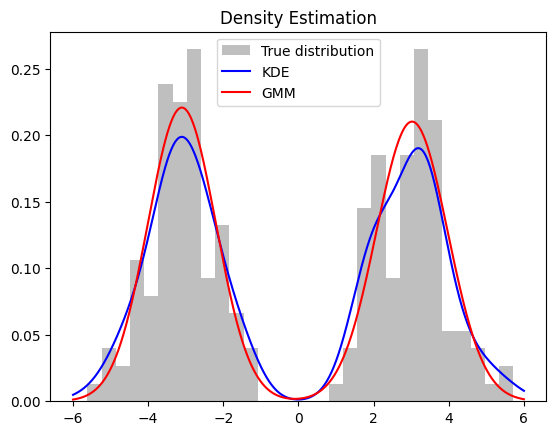

In [6]:
# Визуализация исходных данных
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='True distribution')

# Kernel Density Estimation
kde = kernel_density_estimation(data)
x_plot = np.linspace(-6, 6, 1000)[:, np.newaxis]
kde_density = np.exp(kde.score_samples(x_plot))
plt.plot(x_plot, kde_density, label='KDE', color='blue')

# EM Density Estimation
gmm = em_density_estimation(data)
gmm_density = np.exp(gmm.score_samples(x_plot))
plt.plot(x_plot, gmm_density, label='GMM', color='red')

plt.legend()
plt.title('Density Estimation')
plt.show()

Метод ядерного сглаживания (KDE) отлично подходит для случаев, когда форма распределения неизвестна. Его преимущество — отсутствие строгих предположений о структуре данных. Однако, выбор параметра bandwidth критичен, так как он влияет на степень сглаживания.
EM-алгоритм (GMM) эффективен для данных, которые можно аппроксимировать несколькими гауссианами.

In [7]:
# 3. Реализация метода Метрополиса-Гастингса (несимметричный случай)
def metropolis_hastings(target_density, proposal, num_samples, start_point):
    samples = []
    current = start_point

    for _ in range(num_samples):
        proposed = proposal(current)
        acceptance_ratio = target_density(proposed) / target_density(current)
        if np.random.rand() < acceptance_ratio:
            current = proposed
        samples.append(current)

    return np.array(samples)

# 4. Реализация метода Гиббса
def gibbs_sampling(joint_density, num_samples, start_point):
    samples = [start_point]
    current = start_point.copy()

    for _ in range(num_samples):
        # Обновление первого параметра
        current[0] = np.random.normal(loc=current[1], scale=1)
        # Обновление второго параметра
        current[1] = np.random.normal(loc=current[0], scale=1)
        samples.append(current.copy())

    return np.array(samples)

In [8]:
# 5. Применение методов на восстановленной функции плотности (GMM)
def gmm_density(point):
    return np.exp(gmm.score_samples(point.reshape(1, -1)))[0]

def proposal(current):
    return current + np.random.normal(loc=0, scale=1)

In [9]:
mh_samples = metropolis_hastings(gmm_density, proposal, 1000, start_point=np.array([0.0]))

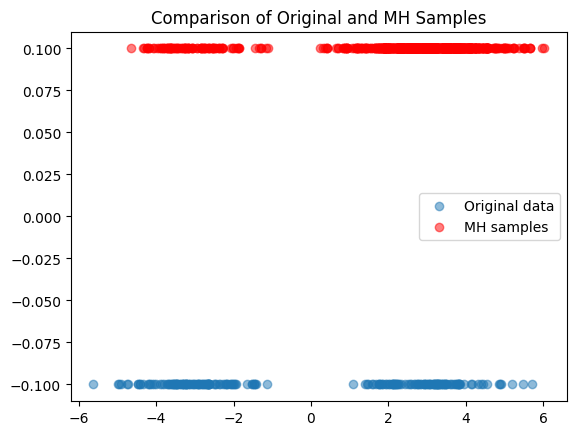

In [10]:
# 6. Визуализация наборов точек
plt.scatter(data, np.zeros_like(data) - 0.1, alpha=0.5, label='Original data')
plt.scatter(mh_samples, np.zeros_like(mh_samples) + 0.1, alpha=0.5, label='MH samples', color='red')
plt.legend()
plt.title('Comparison of Original and MH Samples')
plt.show()

In [11]:
# 7. Блуждание для трехмерной функции плотности (Метрополис-Гастингс)
def three_dim_proposal(current):
    return current + np.random.normal(loc=0, scale=0.5, size=current.shape)

def three_dim_density(point):
    mean = np.zeros(3)
    cov = np.eye(3)
    return multivariate_normal.pdf(point, mean=mean, cov=cov)

In [12]:
three_dim_samples = metropolis_hastings(three_dim_density, three_dim_proposal, 1000, start_point=np.array([0.0, 0.0, 0.0]))

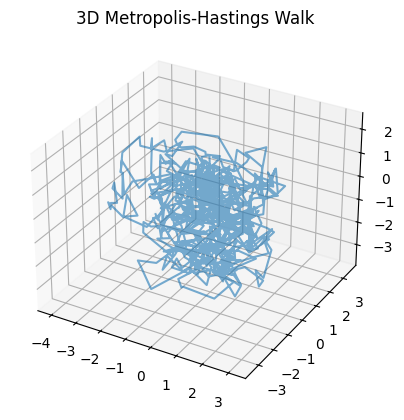

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(three_dim_samples[:, 0], three_dim_samples[:, 1], three_dim_samples[:, 2], alpha=0.6)
plt.title('3D Metropolis-Hastings Walk')
plt.show()

In [14]:
from scipy.stats import entropy

In [15]:
# 8. KL-дивергенция

def kl_divergence(p, q):
    return entropy(p, q)

In [16]:
# Сравнение двух наборов точек (data и mh_samples) в виде гистограмм
original_hist, bins = np.histogram(data, bins=30, density=True)
mh_hist, _ = np.histogram(mh_samples, bins=bins, density=True)

# Выравнивание гистограмм
original_hist += 1e-10
mh_hist += 1e-10

kl_div = kl_divergence(original_hist, mh_hist)
print(f'KL-Divergence between original and MH samples: {kl_div}')

KL-Divergence between original and MH samples: 1.3647311670275732


## Вывод
Методы восстановления плотности (KDE и GMM) и методы выборки (Метрополиса-Гастингса и Гиббса) дополняют друг друга. Они позволяют эффективно моделировать сложные распределения и генерировать новые выборки, которые приближают исходные данные.